In [27]:
#| default_exp app

In [2]:
!pip install -Uqq gradio

In [16]:
#|export
import gradio as gr

In [4]:
#|export
from fastai.vision.all import *

In [6]:
#|export
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('model.pkl')]

In [7]:
#|export
learn = load_learner(path/'model.pkl')

In [8]:
#|export
labels = learn.dls.vocab # read labels from Data Loader

In [9]:
labels

['chp', 'traffic']

In [13]:
#|export
def classify_image(img):
    pred,pred_idx,probs = learn.predict(img) # use passed image for prediction
    return {labels[i]: float(probs[i]) for i in range(len(labels))} # return all results

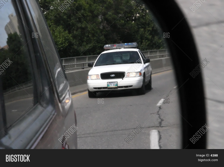

In [11]:
im = PILImage.create('chp.jpg')
im.thumbnail((224,224))
im

In [12]:
learn.predict(im)

('chp', tensor(0), tensor([9.9978e-01, 2.1730e-04]))

In [14]:
classify_image(im)

{'chp': 0.9997827410697937, 'traffic': 0.00021729628497269005}

In [20]:
#|export
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label()
examples = ['chp.jpg', 'traffic.jpg', 'traffic2.jpg', 'traffic3.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/Users/zacharylandes/mambaforge/lib/python3.10/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/zacharylandes/mambaforge/lib/python3.10/site-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/Users/zacharylandes/mambaforge/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Users/zacharylandes/mambaforge/lib/python3.10/site-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [22]:
import nbdev

In [29]:
nbdev.export.nb_export('app.ipynb', 'app')